In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
 

In [6]:
df = pd.read_csv('train.csv')
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [7]:
X = df.drop(columns = ['Id' , 'Cover_Type'])
Y = df['Cover_Type']

In [9]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size =0.2 , random_state =42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# train decision tree classifier
dtc = DecisionTreeClassifier(max_depth=10 , random_state =42)
dtc.fit(X_train_scaled, Y_train)
# make predictions
dtc_predictions = dtc.predict(X_test_scaled)
dtc_accuracy = accuracy_score(Y_test, dtc_predictions)
print("Decision Tree Classifier Accuracy:", dtc_accuracy)
print("Classification Report:\n", classification_report(Y_test, dtc_predictions))

Decision Tree Classifier Accuracy: 0.7622354497354498
Classification Report:
               precision    recall  f1-score   support

           1       0.68      0.69      0.69       421
           2       0.66      0.53      0.59       438
           3       0.70      0.70      0.70       428
           4       0.91      0.94      0.93       449
           5       0.74      0.86      0.80       416
           6       0.70      0.69      0.70       432
           7       0.91      0.91      0.91       440

    accuracy                           0.76      3024
   macro avg       0.76      0.76      0.76      3024
weighted avg       0.76      0.76      0.76      3024



In [12]:
#using KNN classsifier
from sklearn.neighbors import KNeighborsClassifier


In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, Y_train)
knn_predictions = knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(Y_test, knn_predictions)
print("KNN Classifier Accuracy:", knn_accuracy)

KNN Classifier Accuracy: 0.7843915343915344


In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


📊 Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.69      0.69       421
           2       0.66      0.53      0.59       438
           3       0.70      0.70      0.70       428
           4       0.91      0.94      0.93       449
           5       0.74      0.86      0.80       416
           6       0.70      0.69      0.70       432
           7       0.91      0.91      0.91       440

    accuracy                           0.76      3024
   macro avg       0.76      0.76      0.76      3024
weighted avg       0.76      0.76      0.76      3024



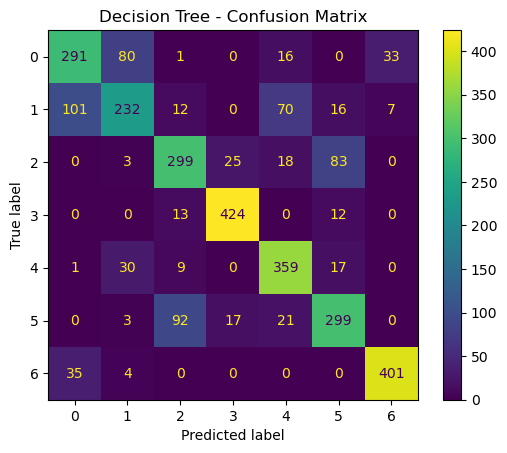

In [19]:
print("📊 Decision Tree Classification Report:")
print(classification_report(Y_test, dtc_predictions))

cm_dt = confusion_matrix(Y_test, dtc_predictions)
ConfusionMatrixDisplay(confusion_matrix=cm_dt).plot()
plt.title("Decision Tree - Confusion Matrix")
plt.show()

📊 KNN Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.63      0.66       421
           2       0.70      0.61      0.65       438
           3       0.74      0.69      0.72       428
           4       0.85      0.95      0.90       449
           5       0.78      0.92      0.85       416
           6       0.75      0.73      0.74       432
           7       0.92      0.96      0.94       440

    accuracy                           0.78      3024
   macro avg       0.78      0.78      0.78      3024
weighted avg       0.78      0.78      0.78      3024



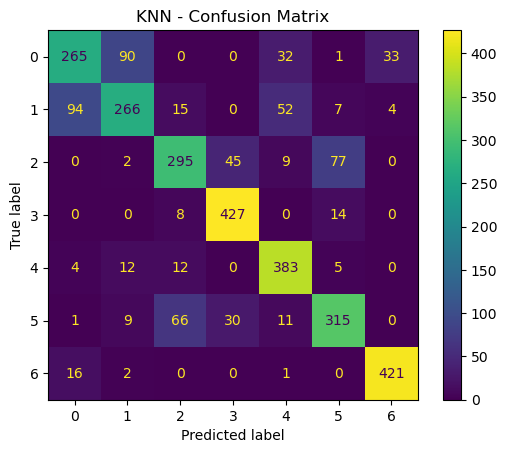

In [20]:
# 📌 KNN Evaluation
print("📊 KNN Classification Report:")
print(classification_report(Y_test, knn_predictions))

cm_knn = confusion_matrix(Y_test, knn_predictions)
ConfusionMatrixDisplay(confusion_matrix=cm_knn).plot()
plt.title("KNN - Confusion Matrix")
plt.show()
